In [1]:
from ay_torch import *

# Test Self-Attention for image recognition
Based on: https://github.com/hszhao/SAN/blob/master/model/san.py

In [2]:
#def aggregation_zeropad(input, weight, kernel_size=3, stride=1, padding=0, dilation=1):

#def aggregation_refpad(input, weight, kernel_size=3, stride=1, padding=0, dilation=1):

#def aggregation(input, weight, kernel_size=3, stride=1, padding=0, dilation=1, pad_mode=1):

class Aggregation(torch.nn.Module):
    def __init__(self, kernel_size=3, stride=1, padding=None, dilation=1, pad_mode='reflection'):
        super(Aggregation, self).__init__()
        if padding is None:  padding = (dilation*(kernel_size-1)+1)//2
        assert pad_mode in ['zero', 'reflection']
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.pad_mode = pad_mode
        if pad_mode == 'zero':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)
        elif pad_mode == 'reflection':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=0, stride=stride)
            self.pad = torch.nn.ReflectionPad2d(padding)

    def forward(self, input, weight):
        #return aggregation(input, weight, self.kernel_size, self.stride, self.padding, self.dilation, self.pad_mode)
        assert input.shape[0] == weight.shape[0] and (input.shape[1] % weight.shape[1] == 0)
        n, c_x, c_w, (in_height, in_width) = input.shape[0], input.shape[1], weight.shape[1], input.shape[2:]
        out_height = int((in_height + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        out_width = int((in_width + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        if self.pad_mode == 'zero':
            #out = functions.aggregation_zeropad(input, weight, kernel_size, stride, padding, dilation)
            x2 = self.unfold_j(input).view(n, c_x // c_w, c_w, pow(self.kernel_size, 2), out_height * out_width)
            return (weight.unsqueeze(1) * x2).sum(-2).view(n, c_x, out_height, out_width)
        elif self.pad_mode == 'reflection':
            #out = functions.aggregation_refpad(input, weight, kernel_size, stride, padding, dilation)
            x2 = self.unfold_j(self.pad(input)).view(n, c_x // c_w, c_w, pow(self.kernel_size, 2), out_height * out_width)
            return (weight.unsqueeze(1) * x2).sum(-2).view(n, c_x, out_height, out_width)

#def subtraction_zeropad(input, kernel_size=3, stride=1, padding=0, dilation=1):

#def subtraction_refpad(input, kernel_size=3, stride=1, padding=0, dilation=1):

#def subtraction(input, kernel_size=3, stride=1, padding=0, dilation=1, pad_mode=1):

class Subtraction(torch.nn.Module):
    def __init__(self, kernel_size=3, stride=1, padding=None, dilation=1, pad_mode='reflection'):
        super(Subtraction, self).__init__()
        if padding is None:  padding = (dilation*(kernel_size-1)+1)//2
        assert pad_mode in ['zero', 'reflection']
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.pad_mode = pad_mode
        self.unfold_i = torch.nn.Unfold(kernel_size=1, dilation=dilation, padding=0, stride=stride)
        if pad_mode == 'zero':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)
        elif pad_mode == 'reflection':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=0, stride=stride)
            self.pad = torch.nn.ReflectionPad2d(padding)

    def forward(self, input):
        #return subtraction(input, self.kernel_size, self.stride, self.padding, self.dilation, self.pad_mode)
        assert input.dim() == 4
        n, c, (in_height, in_width) = input.shape[0], input.shape[1], input.shape[2:]
        out_height = int((in_height + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        out_width = int((in_width + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        if self.pad_mode == 'zero':
            #out = functions.subtraction_zeropad(input, kernel_size, stride, padding, dilation)
            return self.unfold_i(input).view(n, c, 1, out_height * out_width) - self.unfold_j(input).view(n, c, pow(self.kernel_size, 2), out_height * out_width)
        elif self.pad_mode == 'reflection':
            #out = functions.subtraction_refpad(input, kernel_size, stride, padding, dilation)
            return self.unfold_i(input).view(n, c, 1, out_height * out_width) - self.unfold_j(self.pad(input)).view(n, c, pow(self.kernel_size, 2), out_height * out_width)

#def subtraction2_zeropad(input1, input2, kernel_size=3, stride=1, padding=0, dilation=1):

#def subtraction2_refpad(input1, input2, kernel_size=3, stride=1, padding=0, dilation=1):

#def subtraction2(input1, input2, kernel_size=3, stride=1, padding=0, dilation=1, pad_mode=1):

class Subtraction2(torch.nn.Module):
    def __init__(self, kernel_size=3, stride=1, padding=None, dilation=1, pad_mode='reflection'):
        super(Subtraction2, self).__init__()
        if padding is None:  padding = (dilation*(kernel_size-1)+1)//2
        assert pad_mode in ['zero', 'reflection']
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.pad_mode = pad_mode
        self.unfold_i = torch.nn.Unfold(kernel_size=1, dilation=dilation, padding=0, stride=stride)
        if pad_mode == 'zero':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)
        elif pad_mode == 'reflection':
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=0, stride=stride)
            self.pad = torch.nn.ReflectionPad2d(padding)

    def forward(self, input1, input2):
        #return F.subtraction2(input1, input2, self.kernel_size, self.stride, self.padding, self.dilation, self.pad_mode)
        assert input1.dim() == 4 and input2.dim() == 4
        n, c, (in_height, in_width) = input1.shape[0], input1.shape[1], input1.shape[2:]
        out_height = int((in_height + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        out_width = int((in_width + 2 * self.padding - (self.dilation * (self.kernel_size - 1) + 1)) / self.stride + 1)
        if self.pad_mode == 'zero':
            #out = functions.subtraction2_zeropad(input1, input2, kernel_size, stride, padding, dilation)
            return self.unfold_i(input1).view(n, c, 1, out_height * out_width) - self.unfold_j(input2).view(n, c, pow(self.kernel_size, 2), out_height * out_width)
        elif self.pad_mode == 'reflection':
            #out = functions.subtraction2_refpad(input1, input2, kernel_size, stride, padding, dilation)
            return self.unfold_i(input1).view(n, c, 1, out_height * out_width) - self.unfold_j(self.pad(input2)).view(n, c, pow(self.kernel_size, 2), out_height * out_width)
        return out


def conv1x1(in_planes, out_planes, stride=1):
    return torch.nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

def position(H, W, is_cuda=True):
    if is_cuda:
        loc_w = torch.linspace(-1.0, 1.0, W).cuda().unsqueeze(0).repeat(H, 1)
        loc_h = torch.linspace(-1.0, 1.0, H).cuda().unsqueeze(1).repeat(1, W)
    else:
        loc_w = torch.linspace(-1.0, 1.0, W).unsqueeze(0).repeat(H, 1)
        loc_h = torch.linspace(-1.0, 1.0, H).unsqueeze(1).repeat(1, W)
    loc = torch.cat([loc_w.unsqueeze(0), loc_h.unsqueeze(0)], 0).unsqueeze(0)
    return loc


#Ref. https://github.com/hszhao/SAN
class SAM(torch.nn.Module):
    def __init__(self, sa_type, in_planes, rel_planes, out_planes, share_planes, kernel_size=3, stride=1, dilation=1, pad_mode='reflection'):
        super(SAM, self).__init__()
        self.sa_type, self.kernel_size, self.stride = sa_type, kernel_size, stride
        self.conv1 = torch.nn.Conv2d(in_planes, rel_planes, kernel_size=1)
        self.conv2 = torch.nn.Conv2d(in_planes, rel_planes, kernel_size=1)
        self.conv3 = torch.nn.Conv2d(in_planes, out_planes, kernel_size=1)
        if sa_type == 0:
            self.conv_w = torch.nn.Sequential(torch.nn.BatchNorm2d(rel_planes + 2), torch.nn.ReLU(inplace=True),
                                        torch.nn.Conv2d(rel_planes + 2, rel_planes, kernel_size=1, bias=False),
                                        torch.nn.BatchNorm2d(rel_planes), torch.nn.ReLU(inplace=True),
                                        torch.nn.Conv2d(rel_planes, out_planes // share_planes, kernel_size=1))
            self.conv_p = torch.nn.Conv2d(2, 2, kernel_size=1)
            self.subtraction = Subtraction(kernel_size, stride, dilation=dilation, pad_mode=pad_mode)
            self.subtraction2 = Subtraction2(kernel_size, stride, dilation=dilation, pad_mode=pad_mode)
            self.softmax = torch.nn.Softmax(dim=-2)
        else:
            self.conv_w = torch.nn.Sequential(torch.nn.BatchNorm2d(rel_planes * (pow(kernel_size, 2) + 1)), torch.nn.ReLU(inplace=True),
                                        torch.nn.Conv2d(rel_planes * (pow(kernel_size, 2) + 1), out_planes // share_planes, kernel_size=1, bias=False),
                                        torch.nn.BatchNorm2d(out_planes // share_planes), torch.nn.ReLU(inplace=True),
                                        torch.nn.Conv2d(out_planes // share_planes, pow(kernel_size, 2) * out_planes // share_planes, kernel_size=1))
            self.unfold_i = torch.nn.Unfold(kernel_size=1, dilation=dilation, padding=0, stride=stride)
            self.unfold_j = torch.nn.Unfold(kernel_size=kernel_size, dilation=dilation, padding=0, stride=stride)
            self.pad = torch.nn.ReflectionPad2d(kernel_size // 2)
        self.aggregation = Aggregation(kernel_size, stride, dilation=dilation, pad_mode=pad_mode)

    def forward(self, x):
        x1, x2, x3 = self.conv1(x), self.conv2(x), self.conv3(x)
        if self.sa_type == 0:  # pairwise
            p = self.conv_p(position(x.shape[2], x.shape[3], x.is_cuda))
            w = self.softmax(self.conv_w(torch.cat([self.subtraction2(x1, x2), self.subtraction(p).repeat(x.shape[0], 1, 1, 1)], 1)))
        else:  # patchwise
            if self.stride != 1:
                x1 = self.unfold_i(x1)
            x1 = x1.view(x.shape[0], -1, 1, x.shape[2]*x.shape[3])
            x2 = self.unfold_j(self.pad(x2)).view(x.shape[0], -1, 1, x1.shape[-1])
            w = self.conv_w(torch.cat([x1, x2], 1)).view(x.shape[0], -1, pow(self.kernel_size, 2), x1.shape[-1])
        x = self.aggregation(x3, w)
        return x

class Bottleneck(torch.nn.Module):
    def __init__(self, sa_type, in_planes, rel_planes, mid_planes, out_planes, share_planes=8, kernel_size=7, stride=1, pad_mode='reflection'):
        super(Bottleneck, self).__init__()
        self.bn1 = torch.nn.BatchNorm2d(in_planes)
        self.sam = SAM(sa_type, in_planes, rel_planes, mid_planes, share_planes, kernel_size, stride, pad_mode=pad_mode)
        self.bn2 = torch.nn.BatchNorm2d(mid_planes)
        self.conv = torch.nn.Conv2d(mid_planes, out_planes, kernel_size=1)
        self.relu = torch.nn.ReLU(inplace=True)
        self.stride = stride

    def forward(self, x):
        identity = x
        out = self.relu(self.bn1(x))
        out = self.relu(self.bn2(self.sam(out)))
        out = self.conv(out)
        out += identity
        return out

class SAN(torch.nn.Module):
    def __init__(self, sa_type, block, layers, kernels, num_classes, **kwargs):
        super(SAN, self).__init__()
        c = 64
        self.conv_in, self.bn_in = conv1x1(3, c), torch.nn.BatchNorm2d(c)
        self.conv0, self.bn0 = conv1x1(c, c), torch.nn.BatchNorm2d(c)
        self.layer0 = self._make_layer(sa_type, block, c, layers[0], kernels[0], **kwargs)

        c *= 4
        self.conv1, self.bn1 = conv1x1(c // 4, c), torch.nn.BatchNorm2d(c)
        self.layer1 = self._make_layer(sa_type, block, c, layers[1], kernels[1], **kwargs)

        c *= 2
        self.conv2, self.bn2 = conv1x1(c // 2, c), torch.nn.BatchNorm2d(c)
        self.layer2 = self._make_layer(sa_type, block, c, layers[2], kernels[2], **kwargs)

        # c *= 2
        # self.conv3, self.bn3 = conv1x1(c // 2, c), torch.nn.BatchNorm2d(c)
        # self.layer3 = self._make_layer(sa_type, block, c, layers[3], kernels[3], **kwargs)

        # c *= 2
        # self.conv4, self.bn4 = conv1x1(c // 2, c), torch.nn.BatchNorm2d(c)
        # self.layer4 = self._make_layer(sa_type, block, c, layers[4], kernels[4], **kwargs)

        self.relu = torch.nn.ReLU(inplace=True)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
        self.fc = torch.nn.Linear(c, num_classes)

    def _make_layer(self, sa_type, block, planes, blocks, kernel_size=7, stride=1, **kwargs):
        layers = []
        for _ in range(0, blocks):
            layers.append(block(sa_type, planes, planes // 16, planes // 4, planes, 8, kernel_size, stride, **kwargs))
        return torch.nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn_in(self.conv_in(x)))
        x = self.relu(self.bn0(self.layer0(self.conv0(self.pool(x)))))
        x = self.relu(self.bn1(self.layer1(self.conv1(self.pool(x)))))
        x = self.relu(self.bn2(self.layer2(self.conv2(self.pool(x)))))
        # x = self.relu(self.bn3(self.layer3(self.conv3(self.pool(x)))))
        # x = self.relu(self.bn4(self.layer4(self.conv4(self.pool(x)))))

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


def san(sa_type, layers, kernels, num_classes, **kwargs):
    model = SAN(sa_type, Bottleneck, layers, kernels, num_classes, **kwargs)
    return model


def SAN10Pairwise(**kwargs):  return san(sa_type=0, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], **kwargs)
def SAN15Pairwise(**kwargs):  return san(sa_type=0, layers=[3, 2, 3, 5, 2], kernels=[3, 7, 7, 7, 7], **kwargs)
def SAN19Pairwise(**kwargs):  return san(sa_type=0, layers=[3, 3, 4, 6, 3], kernels=[3, 7, 7, 7, 7], **kwargs)
def SAN10Patchwise(**kwargs):  return san(sa_type=1, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], **kwargs)
def SAN15Patchwise(**kwargs):  return san(sa_type=1, layers=[3, 2, 3, 5, 2], kernels=[3, 7, 7, 7, 7], **kwargs)
def SAN19Patchwise(**kwargs):  return san(sa_type=1, layers=[3, 3, 4, 6, 3], kernels=[3, 7, 7, 7, 7], **kwargs)


In [3]:
net= SAN10Pairwise(num_classes=10, pad_mode='zero').eval()
print(net(torch.randn(1,3,32,32)).shape)
net= SAN10Pairwise(num_classes=10).eval()
print(net(torch.randn(1,3,224,224)).shape)

torch.Size([1, 10])
torch.Size([1, 10])


/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Testing SAN with CIFAR-10

In [3]:
def GetDataTransforms(mode):
  if mode=='train':
    # return torchvision.transforms.Compose([
    #     torchvision.transforms.Resize(256),
    #     torchvision.transforms.RandomAffine(degrees=(-10, 10), scale=(1.0, 1.1)),
    #     #torchvision.transforms.RandomRotation(degrees=10),
    #     torchvision.transforms.RandomHorizontalFlip(),
    #     torchvision.transforms.RandomResizedCrop(224),
    #     torchvision.transforms.ColorJitter(brightness=0.2, contrast=0, saturation=0, hue=0),
    #     torchvision.transforms.ToTensor(),
    #     #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    #   ])
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(224),
        torchvision.transforms.Resize(460),
        torchvision.transforms.Pad(20, padding_mode='constant'),  #'reflect'
        # torchvision.transforms.RandomRotation(degrees=10),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomAffine(degrees=10, scale=(1.,1.1), shear=(-0.2,0.2,-0.2,0.2)),
        torchvision.transforms.CenterCrop(460),
        # Warp(magnitude=max_warp=0.2, p=p_affine=0.75, **tkw)
        # Zoom(min_zoom=min_zoom=1., max_zoom=max_zoom=1.1, p=p_affine=0.75, **tkw)
        # torchvision.transforms.Resize(256),
        # torchvision.transforms.RandomAffine(degrees=(-10,10), scale=(0.75,1.1)),
        torchvision.transforms.RandomResizedCrop(112, scale=(0.75,1.), ratio=(1.,1.)),
        torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='test':
    return torchvision.transforms.Compose([
        # torchvision.transforms.Resize(256),
        # torchvision.transforms.CenterCrop(224),
        torchvision.transforms.Resize(112),
        torchvision.transforms.ToTensor(),
        #torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(112),
        torchvision.transforms.ToTensor()
      ])

In [4]:
dset_train= torchvision.datasets.CIFAR10(
              root='./data_downloaded/',
              train=True,
              transform=GetDataTransforms('train'),
              download=True)
dset_test= torchvision.datasets.CIFAR10(
              root='./data_downloaded/',
              train=False,
              transform=GetDataTransforms('test'),
              download=True)
#NOTE: Adjust the batch size.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1],type(dset_train[0][1],),dset_train.classes[dset_train[0][1]])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1],dset_test.classes[dset_test[0][1]])

dset_train size: 50000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 112, 112])
dset_train[0] label value: 6 <class 'int'> frog
dset_train[0][0] value range: tensor(0.0078) tensor(0.8392)
dset_test size: 10000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 112, 112])
dset_test[0] label value: 3 cat


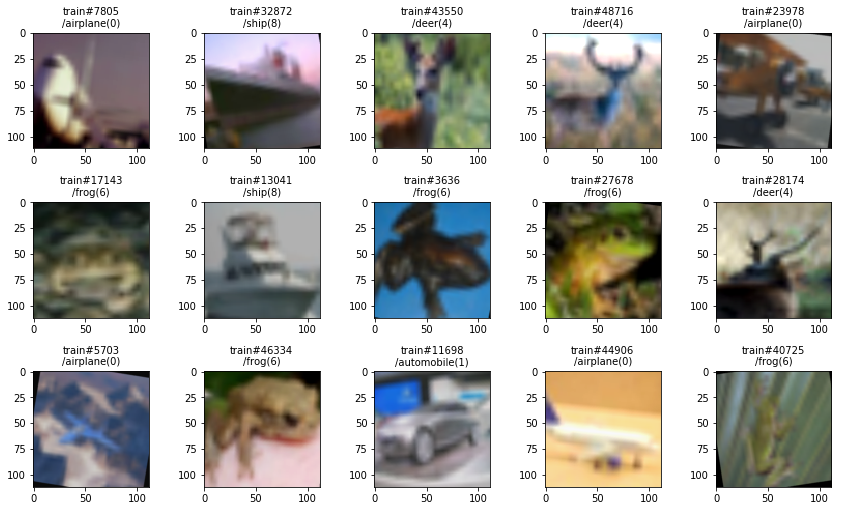

In [6]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n/{d.classes[d[i][1]]}({d[i][1]})' for i in idxes]
PlotImgGrid(imgs, labels)

In [7]:
#Setup a neural network.
# net= SAN10Pairwise(num_classes=len(dset_train.classes))
net= san(sa_type=0, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], num_classes=len(dset_train.classes))

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
# f_loss= torch.nn.MSELoss()
f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred.max(1).indices

def accuracy(y,y_trg):
  return (decode(y)==y_trg).sum().item()/len(y_trg)
f_metric= accuracy

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

In [8]:
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
Summary(net, input_size)

input_size=(1, 3, 112, 112)
input_size=(1, 3, 112, 112)


/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type (var_name))                            Input Shape               Output Shape              Param #
SAN                                                --                        --                        --
├─Conv2d (conv_in)                                 [1, 3, 112, 112]          [1, 64, 112, 112]         192
├─BatchNorm2d (bn_in)                              [1, 64, 112, 112]         [1, 64, 112, 112]         128
├─ReLU (relu)                                      [1, 64, 112, 112]         [1, 64, 112, 112]         --
├─MaxPool2d (pool)                                 [1, 64, 112, 112]         [1, 64, 56, 56]           --
├─Conv2d (conv0)                                   [1, 64, 56, 56]           [1, 64, 56, 56]           4,096
├─Sequential (layer0)                              [1, 64, 56, 56]           [1, 64, 56, 56]           --
│    └─Bottleneck (0)                              [1, 64, 56, 56]           [1, 64, 56, 56]           --
│    │    └─BatchNorm2d (bn1)       

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


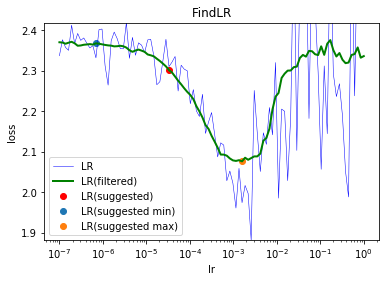

lr= 3.3113112148259103e-05, lr_min=6.918309709189364e-07, lr_max=0.001584893192461113


In [9]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
10	0.54700706	0.66938892	0.80844389	0.76920780	 150.176557
11	0.67457096	0.80592313	0.76374680	0.72083997	 150.232282
12	0.70548975	0.71840059	0.75387628	0.75746417	 149.997871
13	0.65464835	0.70760827	0.77022059	0.76263933	 149.717783
14	0.60104375	0.66447980	0.78918238	0.77080016	 149.496733
15	0.53756715	0.60585363	0.81224025	0.79388933	 149.809740
16	0.46847808	0.57151646	0.83561781	0.80642914	 149.621067
17	0.40220302	0.54939372	0.85995444	0.81558519	 149.583288
18	0.35030722	0.51913027	0.87897618	0.82762739	 149.636979
19	0.32356729	0.51857317	0.88722826	0.82533838	 149.690673
total epochs: 20
total time: 46.88min
best loss(train): 0.32356728741999174@19
best loss(test): 0.5185731670279412@19
best metric(train): 0.29711476982097185@0
best metric(test): 0.36634156050955413@0


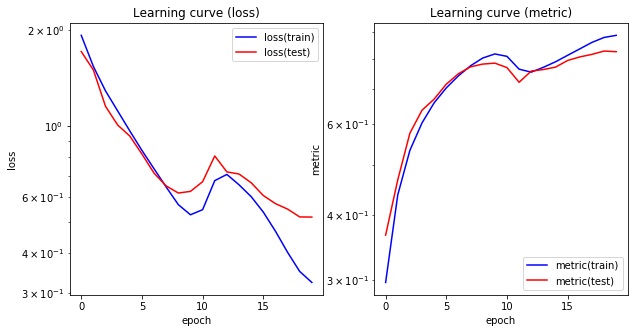

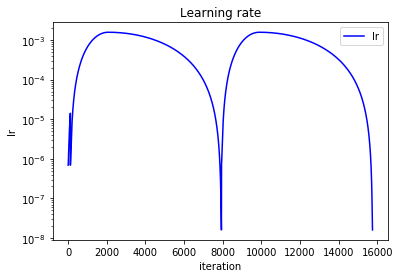

In [13]:
FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
    opt=opt, f_loss=f_loss, f_metric=f_metric,
    dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
    callbacks=(logger.Callbacks(),disp.Callbacks()),
    device=device)
logger.Show()

total epochs: 20
total time: 46.88min
best loss(train): 0.32356728741999174@19
best loss(test): 0.5185731670279412@19
best metric(train): 0.29711476982097185@0
best metric(test): 0.36634156050955413@0


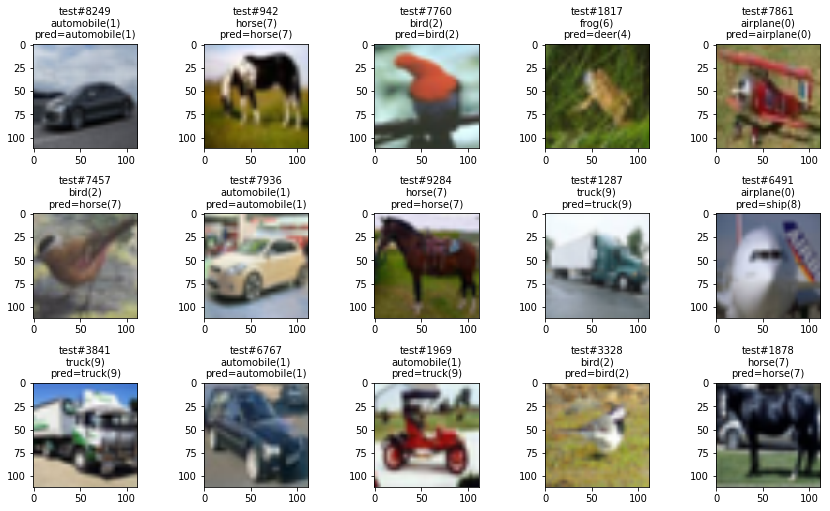

In [14]:
logger.Show('summary')
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred= decode(Eval(net,imgs,device=device)).cpu()
labels= [f'test#{i}\n{d.classes[d[i][1]]}({d[i][1]})\npred={d.classes[lp]}({lp})' for i,lp in zip(idxes,pred)]
PlotImgGrid(imgs, labels)

# Testing SAN with sqptn1s task (no noise on labels)
sqptn1s task: Smaller particles (less overlap)

In [3]:
from cnn_sqptn1_1 import SqPtn1Dataset as SqPtn1sDataset
root='data_generated/sqptn1s/'

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(128),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(128),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(128),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [4]:
dset_train= SqPtn1sDataset(root=root, transform=GetDataTransforms('train'), train=True, label_tsfm=True)
dset_test= SqPtn1sDataset(root=root, transform=GetDataTransforms('eval'), train=False, label_tsfm=True)
#NOTE: Adjust the batch and epoch sizes.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

In [5]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 128, 128])
dset_train[0] label value: tensor([0.3200])
dset_train[0][0] value range: tensor(0.0039) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 128, 128])
dset_test[0] label value: tensor([0.1100])
dset_test[0][0] value range: tensor(0.0039) tensor(1.)


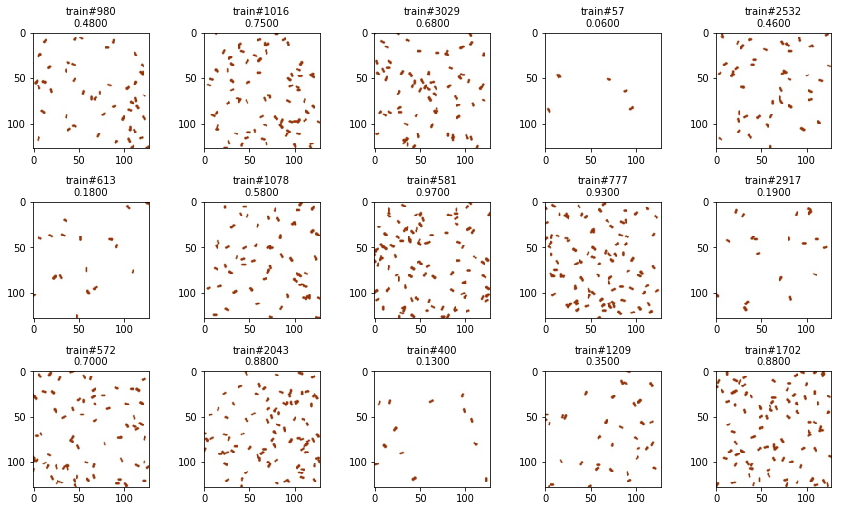

In [6]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

In [7]:
#Setup a neural network.
in_imgshape= dset_train[0][0].shape
# net= SAN10Pairwise(num_classes=1)
# net= san(sa_type=0, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], num_classes=1)
net= san(sa_type=1, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], num_classes=1)

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
# f_loss= torch.nn.MSELoss()
f_loss= torch.nn.L1Loss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

In [8]:
# net
input_size= (1,)+dset_train[0][0].shape
Summary(net, input_size)

input_size=(1, 3, 128, 128)


/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type (var_name))                            Input Shape               Output Shape              Param #
SAN                                                --                        --                        --
├─Conv2d (conv_in)                                 [1, 3, 128, 128]          [1, 64, 128, 128]         192
├─BatchNorm2d (bn_in)                              [1, 64, 128, 128]         [1, 64, 128, 128]         128
├─ReLU (relu)                                      [1, 64, 128, 128]         [1, 64, 128, 128]         --
├─MaxPool2d (pool)                                 [1, 64, 128, 128]         [1, 64, 64, 64]           --
├─Conv2d (conv0)                                   [1, 64, 64, 64]           [1, 64, 64, 64]           4,096
├─Sequential (layer0)                              [1, 64, 64, 64]           [1, 64, 64, 64]           --
│    └─Bottleneck (0)                              [1, 64, 64, 64]           [1, 64, 64, 64]           --
│    │    └─BatchNorm2d (bn1)       

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


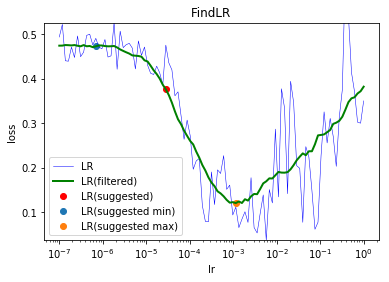

lr= 2.818382931264453e-05, lr_min=6.918309709189364e-07, lr_max=0.001148153621496882


In [9]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
100	0.00621656	0.01291497	0.00798643	0.01775640	 13.356653
101	0.01229710	0.06844154	0.01465580	0.07404444	 13.286452
102	0.01703831	0.01414803	0.02051008	0.01939766	 13.343923
103	0.01190088	0.01425514	0.01493735	0.01951687	 13.344492
104	0.01364996	0.11100627	0.01698712	0.11758606	 13.271283
105	0.01094312	0.02907567	0.01361334	0.03710062	 13.205238
106	0.01080199	0.02292590	0.01332327	0.02986523	 13.208883
107	0.00889575	0.01255206	0.01101415	0.01744469	 13.168592
108	0.00727730	0.01266723	0.00925501	0.01754902	 13.232728
109	0.00603614	0.01260918	0.00772621	0.01754784	 13.181219
i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
110	0.00682844	0.02118835	0.00858160	0.02683229	 13.183114
111	0.00888019	0.01851539	0.01088726	0.02432188	 13.161268
112	0.01388720	0.13253834	0.01688291	0.15393424	 13.179105
113	0.01538374	0.01419950	0.01895868	0.01830572	 13.186440
114	0.01480249	0.01620264	0.01779086	0.0212408

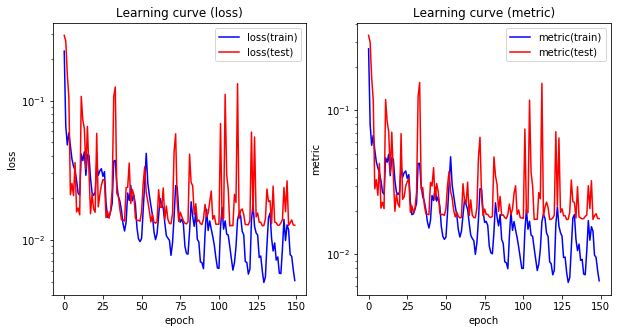

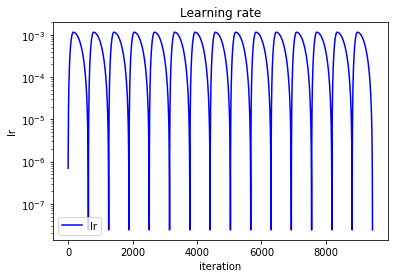

In [13]:
# lr_min,lr_max= 1e-5,1e-2
# lr_min,lr_max= 1e-6,1e-3
# lr_min,lr_max= 1e-4,1e-1
# lr_min,lr_max= 1e-5,5e-2
# lr_min,lr_max= 1e-6,1e-4
# lr_min,lr_max= 1e-6,6e-5
# lr_min,lr_max= 1e-7,1e-5
for i in range(5):
  FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Show()

## SAN patchwise
    net= san(sa_type=1, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], num_classes=1)

total epochs: 150
total time: 27.35min
best loss(train): 0.004923795893167456@129
best loss(test): 0.01255205791676417@107
best metric(train): 0.006383465432990638@129
best metric(test): 0.017415104783140123@128


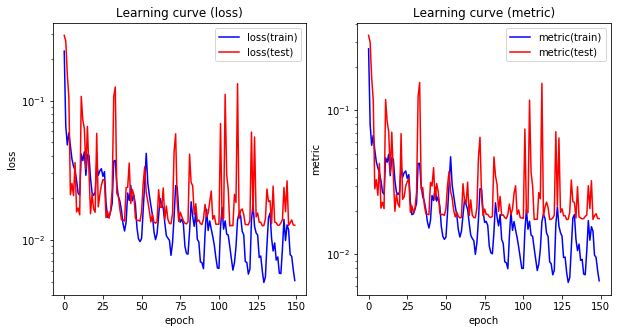

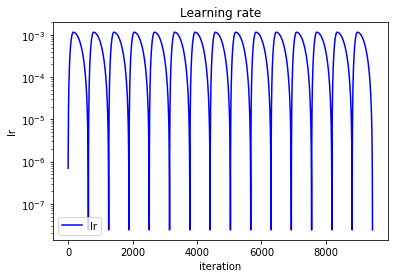

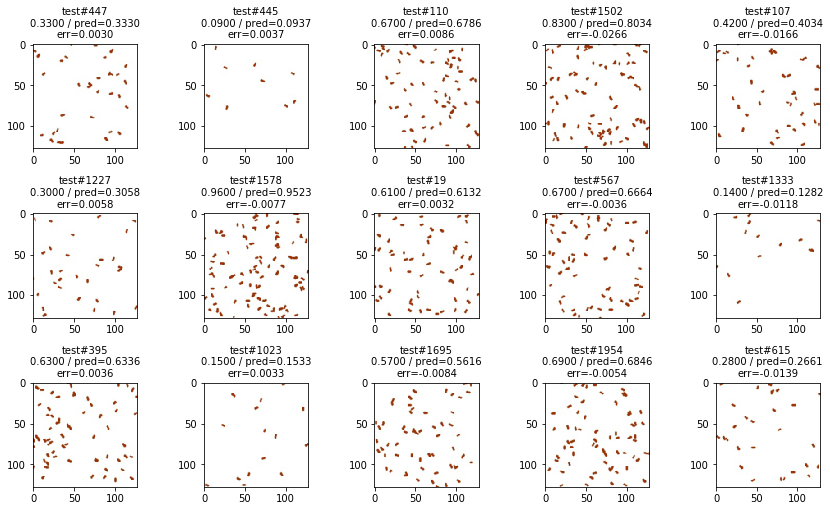

In [14]:
logger.Show('all')
# d= dset_train
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred_y= Eval(net,imgs,device=device).cpu()
labels= [f'test#{i}\n{d[i][1].item():.4f} / pred={lp.item():.4f}\nerr={lp.item()-d[i][1].item():.4f}' for i,lp in zip(idxes,pred_y)]
PlotImgGrid(imgs, labels)

## SAN pairwise
    net= san(sa_type=0, layers=[2, 1, 2, 4, 1], kernels=[3, 7, 7, 7, 7], num_classes=1)

total epochs: 200
total time: 46.59min
best loss(train): 0.004962061472710163@199
best loss(test): 0.00977390311891213@100
best metric(train): 0.00665215822306299@199
best metric(test): 0.013556403486290947@78


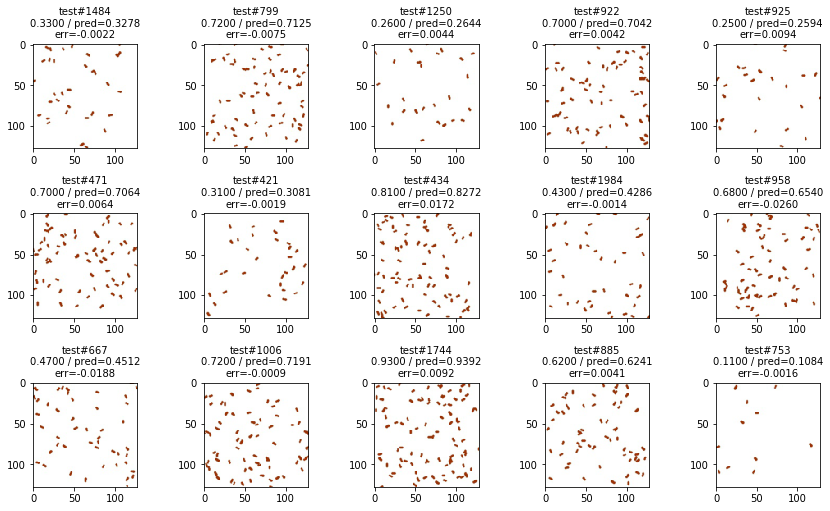

In [38]:
logger.Show('summary')
# d= dset_train
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred_y= Eval(net,imgs,device=device).cpu()
labels= [f'test#{i}\n{d[i][1].item():.4f} / pred={lp.item():.4f}\nerr={lp.item()-d[i][1].item():.4f}' for i,lp in zip(idxes,pred_y)]
PlotImgGrid(imgs, labels)